# <center> Trabajo Practico N2: Redes Recurrentes </center>
<div>
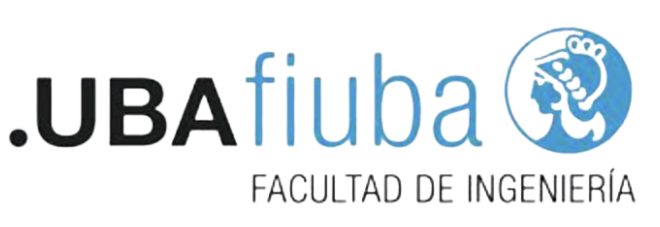
</div>

### <center>José Mornaghi y Lucas Argento</center>

## Introduccion

El proposito de este proyecto es entender el funcionamiento de las Redes Recurrentes.\
Variar entre RNNs y LSTM, modificar los parametros y aplicar las arquitecturas en dos diversos escenarios.

## BTC RNNs

> Fundamento teorico de una RNN:


Utilizando como base los scripts stock_prediction.ipynb, vamos a crear una RNN y LSTM que sea capaz de predecir el precio futuro del BTC en USD.

In [11]:
import pandas as pd
import numpy as np
import math
import matplotlib.pyplot as plt

import torch
import torch.nn as nn
import numpy as np
from sklearn.preprocessing import MinMaxScaler

C:\Users\Jose\AppData\Local\Programs\Python\Python310\lib\site-packages\scipy\__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.2
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [3]:
# Fuente: https://finance.yahoo.com/quote/BTC-USD/history?period1=1535760000&period2=1661990400&interval=1d&filter=history&frequency=1d&includeAdjustedClose=true
df = pd.read_csv('Datasets/BTC-USD.csv')

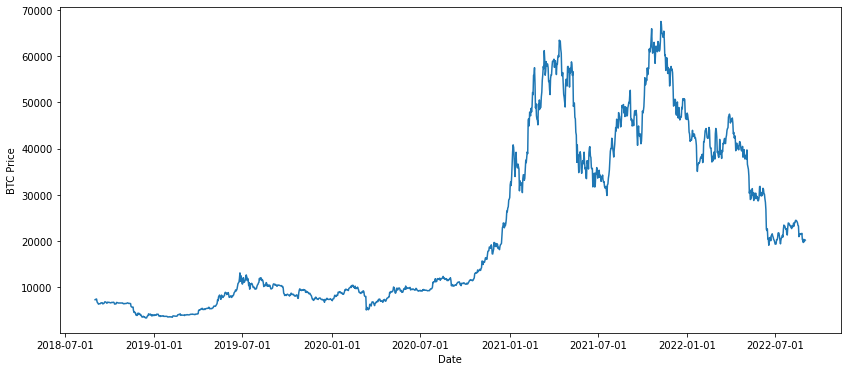

In [10]:
import matplotlib.dates as mdates
import datetime

fmt = mdates.DateFormatter('%Y-%m-%d')
x_date = [datetime.datetime.strptime(i, '%Y-%m-%d') for i in df.Date]

fig, ax = plt.subplots(figsize=(14, 6))

plt.plot(x_date, df.Close)
plt.xticks(rotation=0)
ax.xaxis.set_major_formatter(fmt)

plt.xlabel('Date')
plt.ylabel('BTC Price');


### A) Hacer split del dataset en entranamiento/test.

https://machinelearningmastery.com/data-leakage-machine-learning/

In [15]:
# data leakeage

price = df[['Close']]
scaler = MinMaxScaler(feature_range=(-1, 1))
price.loc[:, 'Close'] = scaler.fit_transform(price['Close'].values.reshape(-1,1))

C:\Users\Jose\AppData\Local\Programs\Python\Python310\lib\site-packages\pandas\core\indexing.py:1951: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[selected_item_labels] = value
